# House price prediction using the ANN (+Regression)


## STEP #0: LIBRARIES IMPORT


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## STEP #1: IMPORT DATASET

In [2]:
house_df = pd.read_csv('kc_house_data.csv', encoding = 'ISO-8859-1')

# get the dataset here: https://www.kaggle.com/shivachandel/kc-house-data

In [3]:
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
house_df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
house_df.tail(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21603,7852140040,20140825T000000,507250.0,3,2.50,2270,5536,2.0,0,0,...,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21604,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,...,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21605,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21606,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
21607,2997800021,20150219T000000,475000.0,3,2.50,1310,1294,2.0,0,0,...,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [6]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## STEP #2: VISUALIZE DATASET

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

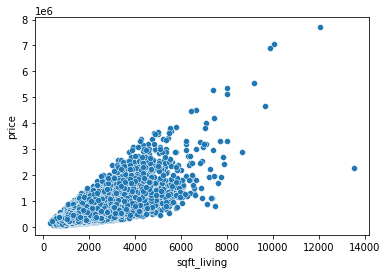

In [8]:
sns.scatterplot(x = 'sqft_living', y = 'price', data = house_df)

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>],
       [<AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>],
       [<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'cen

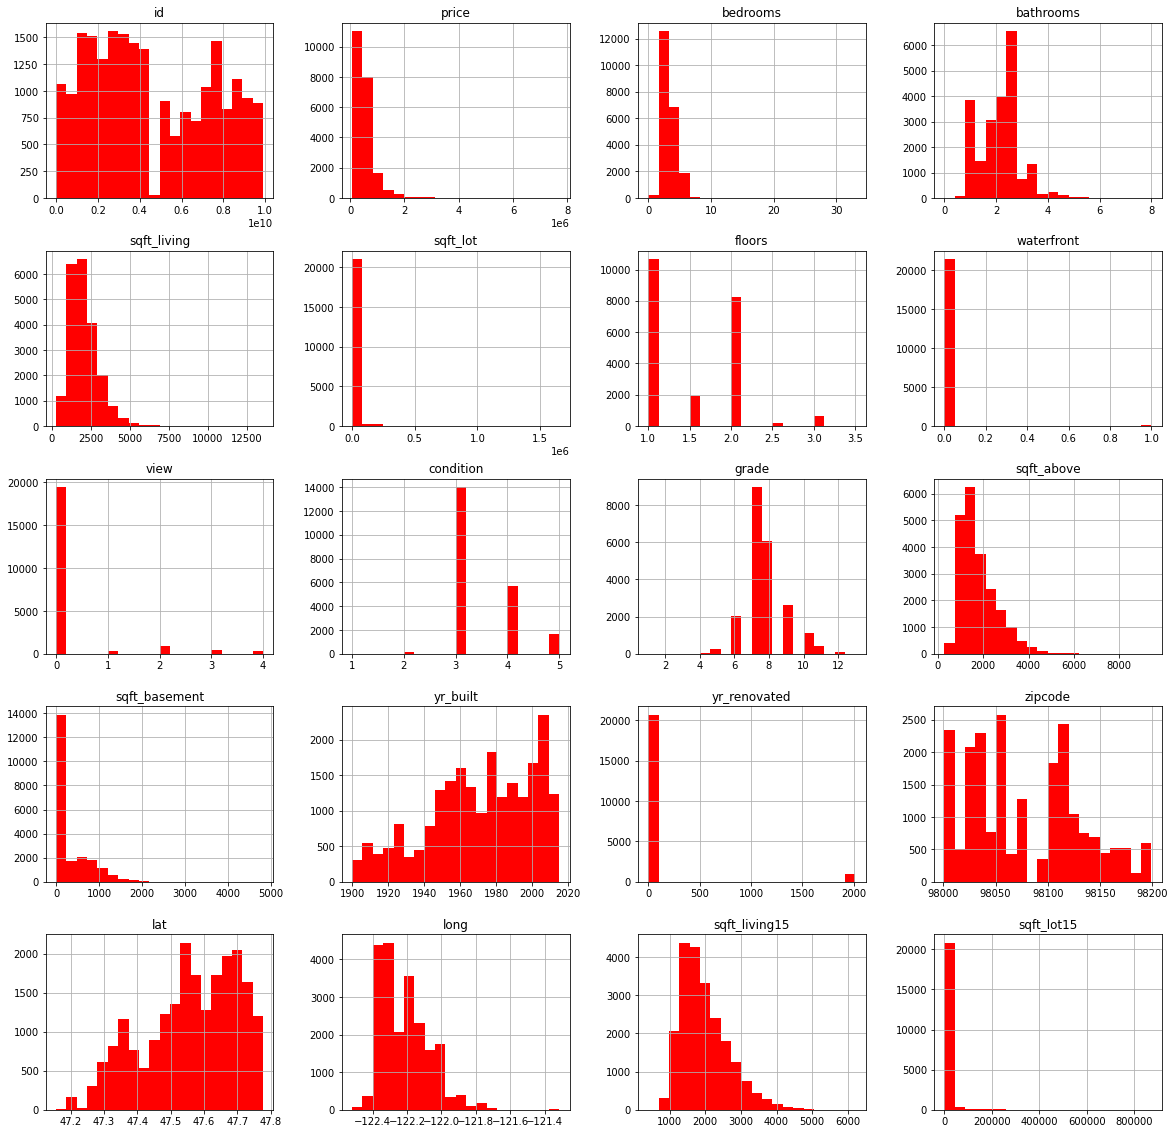

In [9]:
house_df.hist(bins = 20, figsize = (20,20), color = 'r')

<AxesSubplot:>

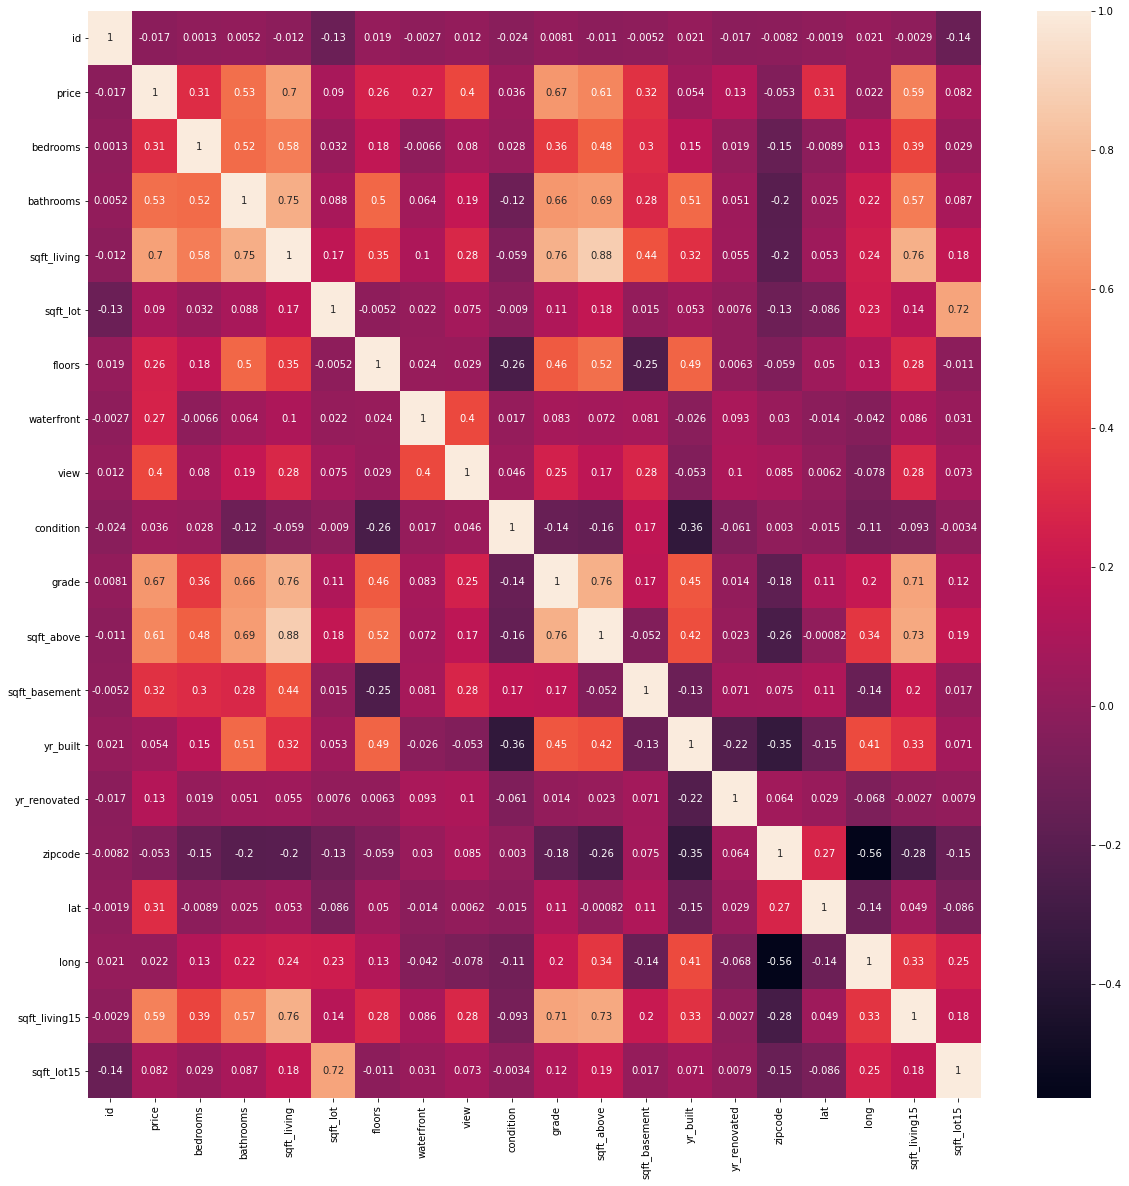

In [10]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(house_df.corr(), annot = True)

In [11]:
house_df_sample = house_df[ ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built']   ]

In [12]:
house_df_sample

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built
0,221900.0,3,1.00,1180,5650,1180,0,1955
1,538000.0,3,2.25,2570,7242,2170,400,1951
2,180000.0,2,1.00,770,10000,770,0,1933
3,604000.0,4,3.00,1960,5000,1050,910,1965
4,510000.0,3,2.00,1680,8080,1680,0,1987
...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,1530,0,2009
21609,400000.0,4,2.50,2310,5813,2310,0,2014
21610,402101.0,2,0.75,1020,1350,1020,0,2009
21611,400000.0,3,2.50,1600,2388,1600,0,2004


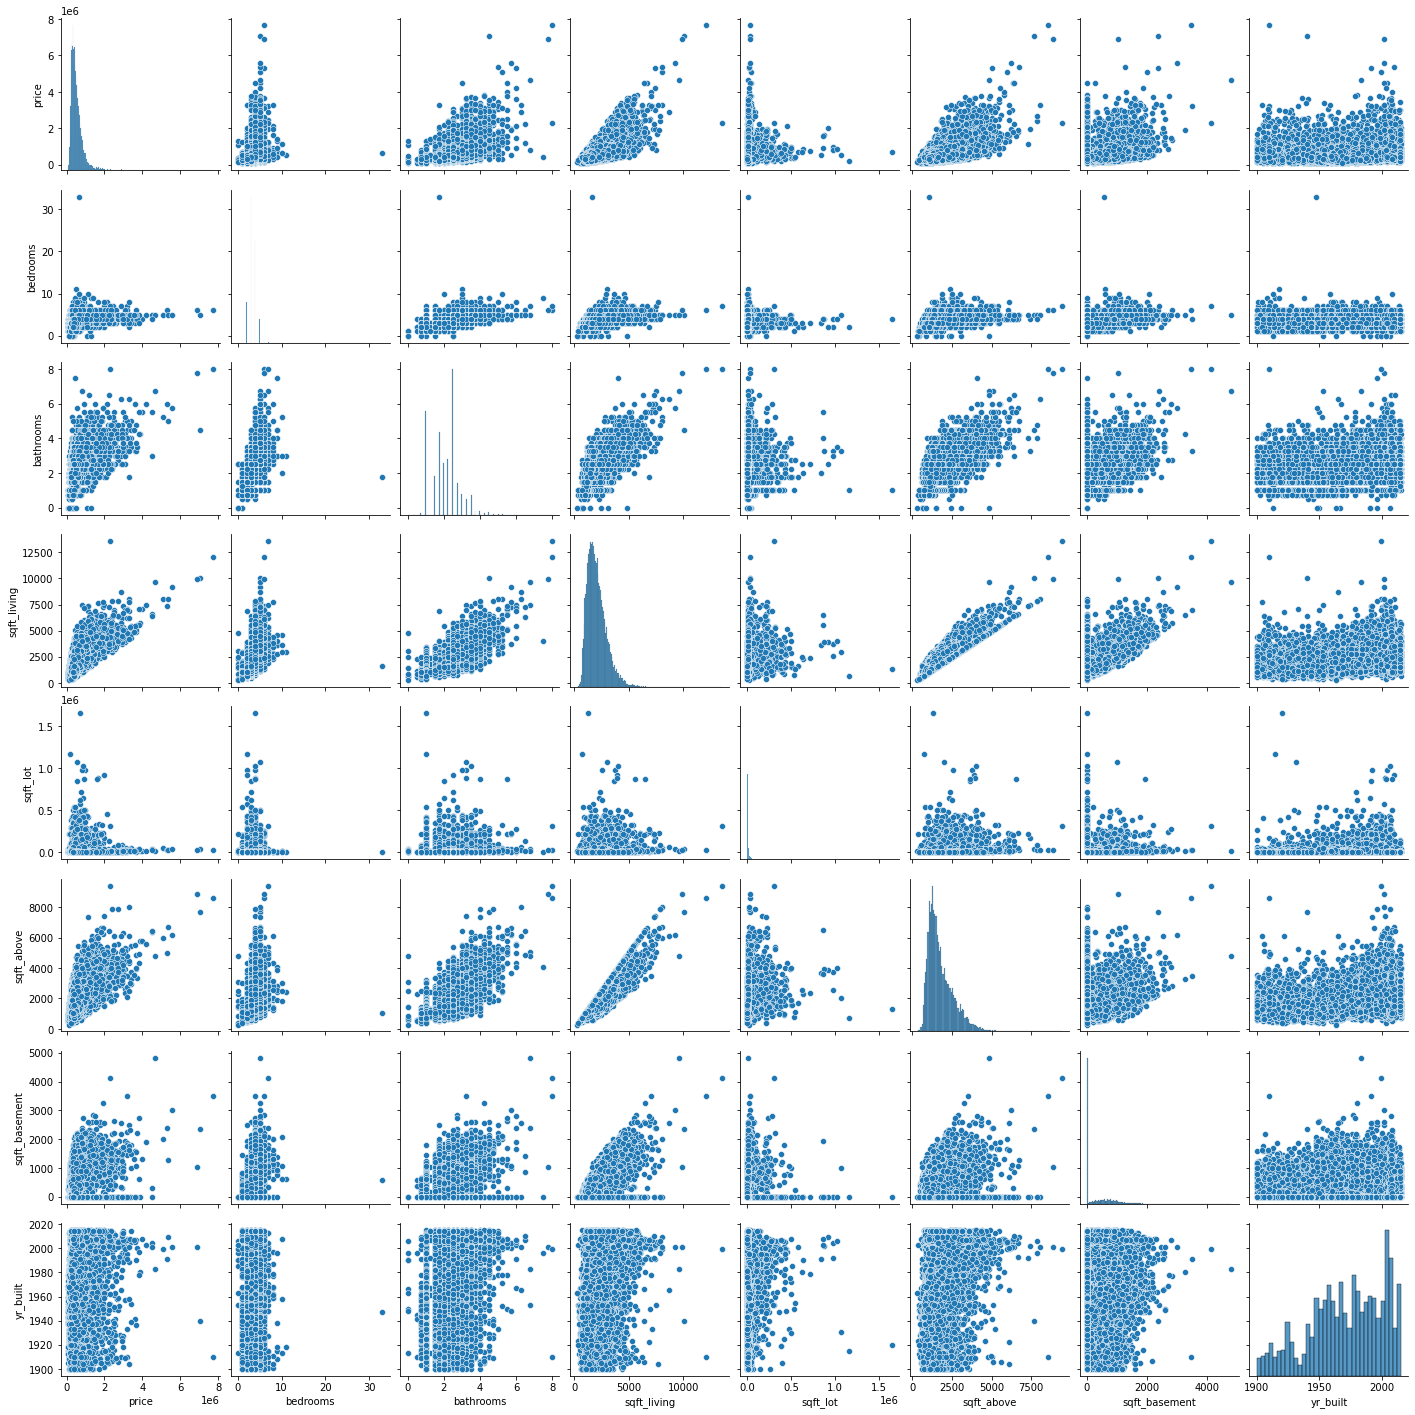

In [13]:
sns.pairplot(house_df_sample)

## STEP #3: REMOVING OUTLIERS

In [14]:
def z_score(data, column):
    #creating global variables for plotting the graph for better demonstration
    global zscore, outlier
    #creating lists to store zscore and outliers 
    zscore = []
    outlier =[]
    # for zscore generally taken thresholds are 2.5, 3 or 3.5 hence i took 3
    threshold = 3
    # calculating the mean of the passed column
    mean = np.mean(data[column])
    # calculating the standard deviation of the passed column
    std = np.std(data[column])
    for i in data[column]:
        z = (i-mean)/std
        zscore.append(z)
        #if the zscore is greater than threshold = 3 that means it is an outlier
        if np.abs(z) > threshold:
            outlier.append(i)
    return print('total outliers', len(outlier))

total outliers 406


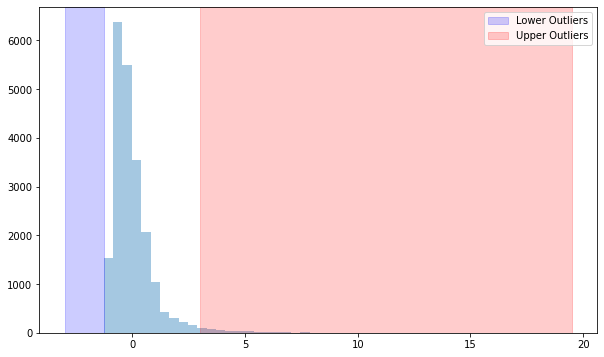

In [16]:
#plotting outliers graph for 'price' feature 
z_score(house_df, 'price')
plt.figure(figsize = (10,6))
sns.distplot(zscore, kde=False)
#print(upper, lower)
plt.axvspan(xmin = -3 ,xmax= min(zscore),alpha=0.2, color='blue', label='Lower Outliers')
plt.axvspan(xmin = 3 ,xmax= max(zscore),alpha=0.2, color='red', label='Upper Outliers')
plt.legend()
plt.show()

In [17]:
#remove the outliers from price using zscore
temp=[]
for i in house_df.price:
    if i in set(outlier):
        temp.append(0.0)
    else:
        temp.append(i)
        
house_df['P'] = temp

house_df = house_df.drop(house_df[house_df['P'] == 0.0].index) 
house_df.shape

(21207, 22)

## STEP #4: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [18]:
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']

In [19]:
X = house_df[selected_features]

In [20]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement
0,3,1.00,1180,5650,1.0,1180,0
1,3,2.25,2570,7242,2.0,2170,400
2,2,1.00,770,10000,1.0,770,0
3,4,3.00,1960,5000,1.0,1050,910
4,3,2.00,1680,8080,1.0,1680,0
...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,1530,0
21609,4,2.50,2310,5813,2.0,2310,0
21610,2,0.75,1020,1350,2.0,1020,0
21611,3,2.50,1600,2388,2.0,1600,0


In [21]:
y = house_df['price']

In [22]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21207, dtype: float64

In [23]:
X.shape

(21207, 7)

In [24]:
y.shape

(21207,)

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
X_scaled

array([[0.09090909, 0.13333333, 0.12378303, ..., 0.        , 0.12660028,
        0.        ],
       [0.09090909, 0.3       , 0.31710709, ..., 0.4       , 0.26742532,
        0.14035088],
       [0.06060606, 0.13333333, 0.06675939, ..., 0.        , 0.06827881,
        0.        ],
       ...,
       [0.06060606, 0.1       , 0.1015299 , ..., 0.4       , 0.10384068,
        0.        ],
       [0.09090909, 0.33333333, 0.1821975 , ..., 0.4       , 0.18634424,
        0.        ],
       [0.06060606, 0.1       , 0.1015299 , ..., 0.4       , 0.10384068,
        0.        ]])

In [27]:
X_scaled.shape

(21207, 7)

In [28]:
scaler.data_max_

array([3.300000e+01, 7.500000e+00, 7.480000e+03, 1.651359e+06,
       3.500000e+00, 7.320000e+03, 2.850000e+03])

In [29]:
scaler.data_min_

array([  0.,   0., 290., 520.,   1., 290.,   0.])

In [30]:
y = y.values.reshape(-1,1)

In [31]:
y_scaled = scaler.fit_transform(y)

In [32]:
y_scaled

array([[0.09386581],
       [0.29584665],
       [0.06709265],
       ...,
       [0.20901022],
       [0.20766773],
       [0.15974441]])

## STEP#5: TRAINING THE MODEL

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [34]:
X_train.shape

(15905, 7)

In [35]:
X_test.shape

(5302, 7)

In [36]:
import tensorflow.keras
from keras.models import Sequential 
from keras.layers import Dense

model = Sequential()
model.add(Dense(100, input_dim = 7, activation = 'relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation = 'linear'))

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               800       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 21,101
Trainable params: 21,101
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [39]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_split = 0.2)

Epoch 1/100
255/255 [==============================] - 1s 2ms/step - loss: 0.0170 - val_loss: 0.0154
Epoch 2/100
255/255 [==============================] - 0s 2ms/step - loss: 0.0145 - val_loss: 0.0158
Epoch 3/100
255/255 [==============================] - 1s 3ms/step - loss: 0.0143 - val_loss: 0.0149
Epoch 4/100
255/255 [==============================] - 1s 2ms/step - loss: 0.0142 - val_loss: 0.0152
Epoch 5/100
255/255 [==============================] - 1s 2ms/step - loss: 0.0141 - val_loss: 0.0148
Epoch 6/100
255/255 [==============================] - 1s 3ms/step - loss: 0.0141 - val_loss: 0.0147
Epoch 7/100
255/255 [==============================] - 1s 2ms/step - loss: 0.0139 - val_loss: 0.0147
Epoch 8/100
255/255 [==============================] - 1s 3ms/step - loss: 0.0138 - val_loss: 0.0154
Epoch 9/100
255/255 [==============================] - 1s 3ms/step - loss: 0.0137 - val_loss: 0.0146
Epoch 10/100
255/255 [==============================] - 1s 3ms/step - loss: 0.0138 - val_lo

255/255 [==============================] - 1s 2ms/step - loss: 0.0125 - val_loss: 0.0137
Epoch 82/100
255/255 [==============================] - 1s 3ms/step - loss: 0.0125 - val_loss: 0.0143
Epoch 83/100
255/255 [==============================] - 1s 2ms/step - loss: 0.0124 - val_loss: 0.0137
Epoch 84/100
255/255 [==============================] - 1s 3ms/step - loss: 0.0125 - val_loss: 0.0149
Epoch 85/100
255/255 [==============================] - 1s 2ms/step - loss: 0.0124 - val_loss: 0.0139
Epoch 86/100
255/255 [==============================] - 1s 3ms/step - loss: 0.0125 - val_loss: 0.0137
Epoch 87/100
255/255 [==============================] - 1s 2ms/step - loss: 0.0124 - val_loss: 0.0137
Epoch 88/100
255/255 [==============================] - 1s 2ms/step - loss: 0.0124 - val_loss: 0.0144
Epoch 89/100
255/255 [==============================] - 1s 2ms/step - loss: 0.0124 - val_loss: 0.0136
Epoch 90/100
255/255 [==============================] - 1s 3ms/step - loss: 0.0124 - val_loss: 

## STEP#6: EVALUATING THE MODEL 

In [40]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

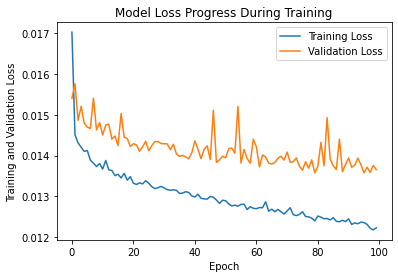

In [41]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

In [42]:
# 'bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement'
X_test_1 = np.array([[ 4, 3, 1960, 5000, 1, 2000, 3000 ]])

scaler_1 = MinMaxScaler()
X_test_scaled_1 = scaler_1.fit_transform(X_test_1)

y_predict_1 = model.predict(X_test_scaled_1)

y_predict_1 = scaler.inverse_transform(y_predict_1)
y_predict_1

array([[175055.98]], dtype=float32)

Text(0, 0.5, 'True Values')

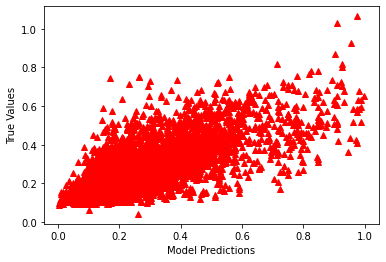

In [43]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [44]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)


(0.0, 3000000.0)

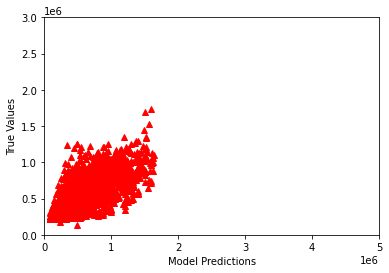

In [45]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000)

In [46]:
k = X_test.shape[1]
n = len(X_test)
n

5302

In [47]:
k

7

In [48]:


from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 180400.932 
MSE = 32544496377.061344 
MAE = 133260.19492349584 
R2 = 0.5080206323243739 
Adjusted R2 = 0.507370111815547


# LINEAR REGRESSION 

In [49]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement
0,3,1.00,1180,5650,1.0,1180,0
1,3,2.25,2570,7242,2.0,2170,400
2,2,1.00,770,10000,1.0,770,0
3,4,3.00,1960,5000,1.0,1050,910
4,3,2.00,1680,8080,1.0,1680,0
...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,1530,0
21609,4,2.50,2310,5813,2.0,2310,0
21610,2,0.75,1020,1350,2.0,1020,0
21611,3,2.50,1600,2388,2.0,1600,0


In [50]:
y

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [52]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)
print('Linear Model Coeff (m)', regressor.coef_)
print('Linear Model Coeff (b)', regressor.intercept_)

Linear Model Coeff (m) [[-3.23526787e+04 -2.76062199e+03  1.54013548e+02 -1.75223857e-01
   3.66366122e+04  6.04402224e+01  9.35733258e+01]]
Linear Model Coeff (b) [123840.34376241]


In [53]:
y_predict = regressor.predict(X_test)


(0.0, 3000000.0)

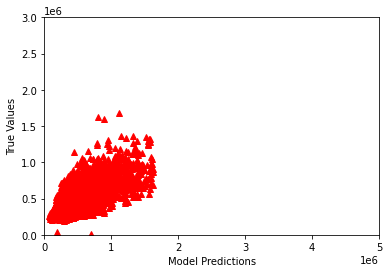

In [54]:
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000)

In [55]:
k = X_test.shape[1]
n = len(X_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 193885.979 
MSE = 37591772713.19671 
MAE = 145973.21495455876 
R2 = 0.4561908678262826 
Adjusted R2 = 0.45547181532813075


# INCREASE THE NUMBER OF FEATURES 

In [56]:
selected_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built', 
'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

X = house_df[selected_features]

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [58]:
y = house_df['price']

In [59]:
y = y.values.reshape(-1,1)
y_scaled = scaler.fit_transform(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [60]:
import tensorflow.keras
from keras.models import Sequential 
from keras.layers import Dense

model = Sequential()
model.add(Dense(50, input_dim = 19, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [61]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [62]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, verbose = 1, validation_split = 0.2)

Epoch 1/100
255/255 [==============================] - 1s 2ms/step - loss: 0.0150 - val_loss: 0.0078
Epoch 2/100
255/255 [==============================] - 1s 2ms/step - loss: 0.0076 - val_loss: 0.0066
Epoch 3/100
255/255 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.0062
Epoch 4/100
255/255 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.0061
Epoch 5/100
255/255 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0056
Epoch 6/100
255/255 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.0054
Epoch 7/100
255/255 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0048
Epoch 8/100
255/255 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0047
Epoch 9/100
255/255 [==============================] - 1s 3ms/step - loss: 0.0047 - val_loss: 0.0044
Epoch 10/100
255/255 [==============================] - 1s 3ms/step - loss: 0.0046 - val_lo

255/255 [==============================] - 1s 2ms/step - loss: 0.0032 - val_loss: 0.0036
Epoch 82/100
255/255 [==============================] - 1s 2ms/step - loss: 0.0032 - val_loss: 0.0036
Epoch 83/100
255/255 [==============================] - 1s 2ms/step - loss: 0.0031 - val_loss: 0.0035
Epoch 84/100
255/255 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0034
Epoch 85/100
255/255 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0039
Epoch 86/100
255/255 [==============================] - 1s 2ms/step - loss: 0.0032 - val_loss: 0.0037
Epoch 87/100
255/255 [==============================] - 1s 2ms/step - loss: 0.0031 - val_loss: 0.0037
Epoch 88/100
255/255 [==============================] - 1s 2ms/step - loss: 0.0031 - val_loss: 0.0034
Epoch 89/100
255/255 [==============================] - 1s 2ms/step - loss: 0.0031 - val_loss: 0.0035
Epoch 90/100
255/255 [==============================] - 1s 3ms/step - loss: 0.0031 - val_loss: 

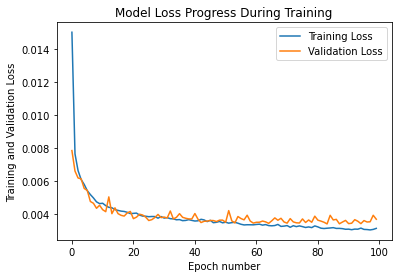

In [63]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch number')
plt.legend(['Training Loss', 'Validation Loss'])

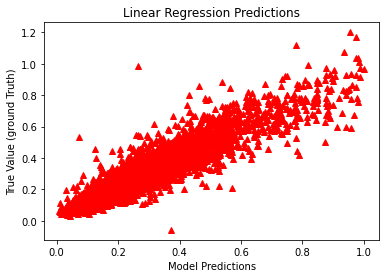

In [64]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Linear Regression Predictions')
plt.show()

In [65]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)


In [66]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 99065.933 
MSE = 9814059042.20727 
MAE = 67091.69141619613 
R2 = 0.8537188886250076 
Adjusted R2 = 0.8535254681906244
